# Vraag 2
Maak een eigen dataset aan om objecten (minimum 5) te herkennen op een platform dat opgebouwd is op de Jetson Nano en de meegeleverde RPi camera. Je kan zelf een probleemstelling bedenken en deze oplossen met je AI model.

In [1]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from google.colab import drive
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
! git clone https://github.com/GijsJackersPXL/Smart_systems_Eindoefening.git

Cloning into 'Smart_systems_Eindoefening'...
remote: Enumerating objects: 321, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 321 (delta 34), reused 36 (delta 12), pack-reused 252
Receiving objects: 100% (321/321), 401.51 MiB | 23.92 MiB/s, done.
Resolving deltas: 100% (118/118), done.
Checking out files: 100% (98/98), done.


In [3]:
# Initialize ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load data from the directory
data_dir = "/content/Smart_systems_Eindoefening/Vraag2/Foto's_objecten/Train"

validation_split zorgt ervoor dat 20% van de foto's gebruikt worden voor te valideren en de overige 80% gebruikt wordt om te trainen

In [4]:
# Load data with flow_from_directory
data_gen = datagen.flow_from_directory(data_dir,
                                      target_size=(224, 224),
                                      batch_size=32,
                                      class_mode='categorical',
                                      shuffle=True)

# Number of classes
num_classes = len(data_gen.class_indices)

# Build model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Found 66 images belonging to 6 classes.


Bij class_mode gebruiken we categorical omdat deze 6 verschillende objecten moet gaan gebruiken.

In [5]:
# Fit model using the generator
history = model.fit(data_gen,
                    steps_per_epoch=len(data_gen),
                    epochs=10,)

Epoch 1/10
3/3 [==============================] - 51s 13s/step - loss: 13.1164 - accuracy: 0.1818
Epoch 2/10
3/3 [==============================] - 50s 12s/step - loss: 13.8822 - accuracy: 0.2727
Epoch 3/10
3/3 [==============================] - 49s 12s/step - loss: 9.3012 - accuracy: 0.2576
Epoch 4/10
3/3 [==============================] - 48s 12s/step - loss: 5.3834 - accuracy: 0.3182
Epoch 5/10
3/3 [==============================] - 48s 23s/step - loss: 0.9188 - accuracy: 0.6818
Epoch 6/10
3/3 [==============================] - 48s 23s/step - loss: 0.6654 - accuracy: 0.8333
Epoch 7/10
3/3 [==============================] - 49s 12s/step - loss: 0.3109 - accuracy: 1.0000
Epoch 8/10
3/3 [==============================] - 51s 13s/step - loss: 0.2369 - accuracy: 1.0000
Epoch 9/10
3/3 [==============================] - 48s 12s/step - loss: 0.1552 - accuracy: 1.0000
Epoch 10/10
3/3 [==============================] - 49s 23s/step - loss: 0.0920 - accuracy: 1.0000


In [6]:
# Save model
model.save('model.h5')

In [7]:
def preprocess_image(image, grayscale=False, data_augmentation=False):
  # Resize the image
  image = cv2.resize(image, (224, 224))

  # Convert the image to grayscale if needed
  if grayscale:
      image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      image = np.expand_dims(image, -1)

  # Normalize the pixel values
  image = image / 255.0

  # If data augmentation is enabled, randomly apply some transformations
  # if data_augmentation:
  #     image = random_transform(image)

  # Add an extra dimension to the image so that it has shape (1, height, width, channels)
  image = np.expand_dims(image, 0)

  return image

In [37]:
def Wat_is_het(index):
  if index == 0:
      return "Het is een DVB"
  elif index == 1:
      return "Het is een muis"
  elif index == 2:
      return "Het is een PSoC"
  elif index == 3:
      return "Het is een Pen"
  elif index == 4:
      return "Het is een pynq"
  elif index == 5:
      return "Het is een rekenmachine"
  else:
      return "Error!"

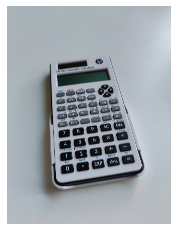

In [54]:
# Load image
### Enkele DVB foto's
#image = cv2.imread("/content/Smart_systems_Eindoefening/Vraag2/Foto's_objecten/Train/DVB/IMG20230103150620.jpg")
#image = cv2.imread("/content/Smart_systems_Eindoefening/Vraag2/Foto's_objecten/Train/DVB/IMG20230103150628.jpg")
#image = cv2.imread("/content/Smart_systems_Eindoefening/Vraag2/Foto's_objecten/Train/DVB/IMG20230103150634.jpg")

### Enkele Muis foto's
#image = cv2.imread("/content/Smart_systems_Eindoefening/Vraag2/Foto's_objecten/Train/Muis/IMG20230103150823.jpg")
#image = cv2.imread("/content/Smart_systems_Eindoefening/Vraag2/Foto's_objecten/Train/Muis/IMG20230103150830.jpg")
#image = cv2.imread("/content/Smart_systems_Eindoefening/Vraag2/Foto's_objecten/Train/Muis/IMG20230103150833.jpg")

### Enkele PCoC foto's
#image = cv2.imread("/content/Smart_systems_Eindoefening/Vraag2/Foto's_objecten/Train/PSoC/IMG20230103150342.jpg")
#image = cv2.imread("/content/Smart_systems_Eindoefening/Vraag2/Foto's_objecten/Train/PSoC/IMG20230103150346.jpg")
#image = cv2.imread("/content/Smart_systems_Eindoefening/Vraag2/Foto's_objecten/Train/PSoC/IMG20230103150353.jpg")
#image = cv2.imread("/content/Smart_systems_Eindoefening/Vraag2/Foto's_objecten/Train/PSoC/IMG20230103150357.jpg")
#image = cv2.imread("/content/Smart_systems_Eindoefening/Vraag2/Foto's_objecten/Train/PSoC/IMG20230103150415.jpg")

### Enkele Pen foto's
#image = cv2.imread("/content/Smart_systems_Eindoefening/Vraag2/Foto's_objecten/Train/Pen/IMG20230103150511.jpg")
#image = cv2.imread("/content/Smart_systems_Eindoefening/Vraag2/Foto's_objecten/Train/Pen/IMG20230103150514.jpg")
#image = cv2.imread("/content/Smart_systems_Eindoefening/Vraag2/Foto's_objecten/Train/Pen/IMG20230103150551.jpg")

### Enkele Pynq foto's
#image = cv2.imread("/content/Smart_systems_Eindoefening/Vraag2/Foto's_objecten/Train/Pynq/IMG20230103150710.jpg")
#image = cv2.imread("/content/Smart_systems_Eindoefening/Vraag2/Foto's_objecten/Train/Pynq/IMG20230103150724.jpg")
#image = cv2.imread("/content/Smart_systems_Eindoefening/Vraag2/Foto's_objecten/Train/Pynq/IMG20230103150732.jpg")

### Enkele Rekenmachine foto's
image = cv2.imread("/content/Smart_systems_Eindoefening/Vraag2/Foto's_objecten/Train/Rekenmachine/IMG20230103150237.jpg")
#image = cv2.imread("/content/Smart_systems_Eindoefening/Vraag2/Foto's_objecten/Train/Rekenmachine/IMG20230103150245.jpg")
#image = cv2.imread("/content/Smart_systems_Eindoefening/Vraag2/Foto's_objecten/Train/Rekenmachine/IMG20230103150251.jpg")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display image
plt.imshow(image)
plt.axis('off')
plt.show()


In [55]:
# Preprocess the image
image = preprocess_image(image)

# Run the model and get the predictions
predictions = model.predict(image)

# Find the index of the maximum element
index = np.argmax(predictions)

# Print the index of Wat_is_het
print(Wat_is_het(index))

1/1 [==============================] - 0s 32ms/step
Het is een rekenmachine
